# " Analyzing twitter data using ML Algorithms on Twitter data"

## Importing Needed packages

In [120]:
import nltk
import re
import pandas as pd
import numpy as np
from sklearn import preprocessing
import seaborn as sns
%matplotlib inline 
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
plt.rcParams['figure.figsize'] = 12,10

## Reading data from file..

In [121]:
df=pd.read_csv('Information.csv') #Reading the csv file

In [122]:
df.head()

,_unit_id,_golden,_unit_state,_trusted_judgments,_last_judgment_at,gender,gender:confidence,profile_yn,profile_yn:confidence,created,...,profileimage,retweet_count,sidebar_color,text,tweet_coord,tweet_count,tweet_created,tweet_id,tweet_location,user_timezone
0,815719226,False,finalized,3,10/26/15 23:24,male,1.0000,yes,1.0,12-05-2013 01:48,...,https://pbs.twimg.com/profile_images/414342229...,0,FFFFFF,Robbie E Responds To Critics After Win Against...,NaN,110964,10/26/15 12:40,6.590000e+17,main; @Kan1shk3,Chennai
1,815719227,False,finalized,3,10/26/15 23:30,male,1.0000,yes,1.0,10-01-2012 13:51,...,https://pbs.twimg.com/profile_images/539604221...,0,C0DEED,‰ÛÏIt felt like they were my friends and I was...,NaN,7471,10/26/15 12:40,6.590000e+17,NaN,Eastern Time (US & Canada)
2,815719228,False,finalized,3,10/26/15 23:33,male,0.6625,yes,1.0,11/28/14 11:30,...,https://pbs.twimg.com/profile_images/657330418...,1,C0DEED,i absolutely adore when louis starts the songs...,NaN,5617,10/26/15 12:40,6.590000e+17,clcncl,Belgrade
3,815719229,False,finalized,3,10/26/15 23:10,male,1.0000,yes,1.0,06-11-2009 22:39,...,https://pbs.twimg.com/profile_images/259703936...,0,C0DEED,Hi @JordanSpieth - Looking at the url - do you...,NaN,1693,10/26/15 12:40,6.590000e+17,"Palo Alto, CA",Pacific Time (US & Canada)
4,815719230,False,finalized,3,10/27/15 1:15,female,1.0000,yes,1.0,4/16/14 13:23,...,https://pbs.twimg.com/profile_images/564094871...,0,0,Watching Neighbours on Sky+ catching up with t...,NaN,31462,10/26/15 12:40,6.590000e+17,NaN,NaN


In [123]:
# Calculate total number of cells in dataframe
totalCells = np.product(df.shape)

# Count number of missing values per column
missingCount = df.isnull().sum()

# Calculate total number of missing values
totalMissing = missingCount.sum()

# Calculate percentage of missing values
print("The df dataset contains", round(((totalMissing/totalCells) * 100), 2), "%", "missing values.")

The df dataset contains 15.17 % missing values.


In [124]:
missingCount[['tweet_location', 'user_timezone','tweet_coord','profile_yn_gold','gender_gold','description','_last_judgment_at','gender','gender:confidence']]

tweet_location        7484
user_timezone         7798
tweet_coord          19891
profile_yn_gold      20000
gender_gold          20000
description           3744
_last_judgment_at       50
gender                  97
gender:confidence       26
dtype: int64

In [125]:
print("Percent missing data in profile_yn_gold column =", (round(((missingCount['profile_yn_gold'] / df.shape[0]) * 100), 2)))
print("Percent missing data in gender_gold column =", (round(((missingCount['gender_gold'] / df.shape[0]) * 100), 2)))
print("Percent missing data in tweet_location column =", (round(((missingCount['tweet_location'] / df.shape[0]) * 100), 2)))
print("Percent missing data in user_timezone column =", (round(((missingCount['user_timezone'] / df.shape[0]) * 100), 2)))
print("Percent missing data in tweet_coord column =", (round(((missingCount['tweet_coord'] / df.shape[0]) * 100), 2)))
print("Percent missing data in description column =", (round(((missingCount['description'] / df.shape[0]) * 100), 2)))

Percent missing data in profile_yn_gold column = 99.75
Percent missing data in gender_gold column = 99.75
Percent missing data in tweet_location column = 37.33
Percent missing data in user_timezone column = 38.89
Percent missing data in tweet_coord column = 99.21
Percent missing data in description column = 18.67


In [126]:
df.dropna()

,_unit_id,_golden,_unit_state,_trusted_judgments,_last_judgment_at,gender,gender:confidence,profile_yn,profile_yn:confidence,created,...,profileimage,retweet_count,sidebar_color,text,tweet_coord,tweet_count,tweet_created,tweet_id,tweet_location,user_timezone


In [127]:
dfCleanCols = df.dropna(axis=1)
dfCleanCols.head()

,_unit_id,_golden,_unit_state,_trusted_judgments,profile_yn,profile_yn:confidence,created,fav_number,link_color,name,profileimage,retweet_count,sidebar_color,text,tweet_count,tweet_created,tweet_id
0,815719226,False,finalized,3,yes,1.0,12-05-2013 01:48,0,08C2C2,sheezy0,https://pbs.twimg.com/profile_images/414342229...,0,FFFFFF,Robbie E Responds To Critics After Win Against...,110964,10/26/15 12:40,6.590000e+17
1,815719227,False,finalized,3,yes,1.0,10-01-2012 13:51,68,0084B4,DavdBurnett,https://pbs.twimg.com/profile_images/539604221...,0,C0DEED,‰ÛÏIt felt like they were my friends and I was...,7471,10/26/15 12:40,6.590000e+17
2,815719228,False,finalized,3,yes,1.0,11/28/14 11:30,7696,ABB8C2,lwtprettylaugh,https://pbs.twimg.com/profile_images/657330418...,1,C0DEED,i absolutely adore when louis starts the songs...,5617,10/26/15 12:40,6.590000e+17
3,815719229,False,finalized,3,yes,1.0,06-11-2009 22:39,202,0084B4,douggarland,https://pbs.twimg.com/profile_images/259703936...,0,C0DEED,Hi @JordanSpieth - Looking at the url - do you...,1693,10/26/15 12:40,6.590000e+17
4,815719230,False,finalized,3,yes,1.0,4/16/14 13:23,37318,3B94D9,WilfordGemma,https://pbs.twimg.com/profile_images/564094871...,0,0,Watching Neighbours on Sky+ catching up with t...,31462,10/26/15 12:40,6.590000e+17


In [128]:
print("Columns in original dataset: %d \n" % df.shape[1])
print("Columns with na's dropped: %d" % dfCleanCols.shape[1])

Columns in original dataset: 26 

Columns with na's dropped: 17


In [129]:
df = df.fillna(method='ffill', axis=0).fillna("0") # Filling NaN with 0

df.head()

,_unit_id,_golden,_unit_state,_trusted_judgments,_last_judgment_at,gender,gender:confidence,profile_yn,profile_yn:confidence,created,...,profileimage,retweet_count,sidebar_color,text,tweet_coord,tweet_count,tweet_created,tweet_id,tweet_location,user_timezone
0,815719226,False,finalized,3,10/26/15 23:24,male,1.0000,yes,1.0,12-05-2013 01:48,...,https://pbs.twimg.com/profile_images/414342229...,0,FFFFFF,Robbie E Responds To Critics After Win Against...,0,110964,10/26/15 12:40,6.590000e+17,main; @Kan1shk3,Chennai
1,815719227,False,finalized,3,10/26/15 23:30,male,1.0000,yes,1.0,10-01-2012 13:51,...,https://pbs.twimg.com/profile_images/539604221...,0,C0DEED,‰ÛÏIt felt like they were my friends and I was...,0,7471,10/26/15 12:40,6.590000e+17,main; @Kan1shk3,Eastern Time (US & Canada)
2,815719228,False,finalized,3,10/26/15 23:33,male,0.6625,yes,1.0,11/28/14 11:30,...,https://pbs.twimg.com/profile_images/657330418...,1,C0DEED,i absolutely adore when louis starts the songs...,0,5617,10/26/15 12:40,6.590000e+17,clcncl,Belgrade
3,815719229,False,finalized,3,10/26/15 23:10,male,1.0000,yes,1.0,06-11-2009 22:39,...,https://pbs.twimg.com/profile_images/259703936...,0,C0DEED,Hi @JordanSpieth - Looking at the url - do you...,0,1693,10/26/15 12:40,6.590000e+17,"Palo Alto, CA",Pacific Time (US & Canada)
4,815719230,False,finalized,3,10/27/15 1:15,female,1.0000,yes,1.0,4/16/14 13:23,...,https://pbs.twimg.com/profile_images/564094871...,0,0,Watching Neighbours on Sky+ catching up with t...,0,31462,10/26/15 12:40,6.590000e+17,"Palo Alto, CA",Pacific Time (US & Canada)


In [130]:
#Summarising the data
df.describe()

,_unit_id,_trusted_judgments,gender:confidence,profile_yn:confidence,fav_number,retweet_count,tweet_count,tweet_id
count,2.005000e+04,20050.000000,20050.000000,20050.000000,20050.000000,20050.000000,2.005000e+04,2.005000e+04
mean,8.157294e+08,3.615711,0.882744,0.993221,4382.201646,0.079401,3.892469e+04,6.590000e+17
std,6.000801e+03,12.331890,0.191451,0.047168,12518.575919,2.649751,1.168371e+05,1.536038e+05
min,8.157192e+08,3.000000,0.000000,0.627200,0.000000,0.000000,1.000000e+00,6.590000e+17
25%,8.157243e+08,3.000000,0.677800,1.000000,11.000000,0.000000,2.398000e+03,6.590000e+17
50%,8.157294e+08,3.000000,1.000000,1.000000,456.000000,0.000000,1.144150e+04,6.590000e+17
75%,8.157345e+08,3.000000,1.000000,1.000000,3315.500000,0.000000,4.002750e+04,6.590000e+17
max,8.157580e+08,274.000000,1.000000,1.000000,341621.000000,330.000000,2.680199e+06,6.590000e+17


In [131]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20050 entries, 0 to 20049
Data columns (total 26 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   _unit_id               20050 non-null  int64  
 1   _golden                20050 non-null  bool   
 2   _unit_state            20050 non-null  object 
 3   _trusted_judgments     20050 non-null  int64  
 4   _last_judgment_at      20050 non-null  object 
 5   gender                 20050 non-null  object 
 6   gender:confidence      20050 non-null  float64
 7   profile_yn             20050 non-null  object 
 8   profile_yn:confidence  20050 non-null  float64
 9   created                20050 non-null  object 
 10  description            20050 non-null  object 
 11  fav_number             20050 non-null  int64  
 12  gender_gold            20050 non-null  object 
 13  link_color             20050 non-null  object 
 14  name                   20050 non-null  object 
 15  pr

In [132]:
df.isnull().sum()# Further checking for null values in each column

_unit_id                 0
_golden                  0
_unit_state              0
_trusted_judgments       0
_last_judgment_at        0
gender                   0
gender:confidence        0
profile_yn               0
profile_yn:confidence    0
created                  0
description              0
fav_number               0
gender_gold              0
link_color               0
name                     0
profile_yn_gold          0
profileimage             0
retweet_count            0
sidebar_color            0
text                     0
tweet_coord              0
tweet_count              0
tweet_created            0
tweet_id                 0
tweet_location           0
user_timezone            0
dtype: int64

In [133]:
df.head()

,_unit_id,_golden,_unit_state,_trusted_judgments,_last_judgment_at,gender,gender:confidence,profile_yn,profile_yn:confidence,created,...,profileimage,retweet_count,sidebar_color,text,tweet_coord,tweet_count,tweet_created,tweet_id,tweet_location,user_timezone
0,815719226,False,finalized,3,10/26/15 23:24,male,1.0000,yes,1.0,12-05-2013 01:48,...,https://pbs.twimg.com/profile_images/414342229...,0,FFFFFF,Robbie E Responds To Critics After Win Against...,0,110964,10/26/15 12:40,6.590000e+17,main; @Kan1shk3,Chennai
1,815719227,False,finalized,3,10/26/15 23:30,male,1.0000,yes,1.0,10-01-2012 13:51,...,https://pbs.twimg.com/profile_images/539604221...,0,C0DEED,‰ÛÏIt felt like they were my friends and I was...,0,7471,10/26/15 12:40,6.590000e+17,main; @Kan1shk3,Eastern Time (US & Canada)
2,815719228,False,finalized,3,10/26/15 23:33,male,0.6625,yes,1.0,11/28/14 11:30,...,https://pbs.twimg.com/profile_images/657330418...,1,C0DEED,i absolutely adore when louis starts the songs...,0,5617,10/26/15 12:40,6.590000e+17,clcncl,Belgrade
3,815719229,False,finalized,3,10/26/15 23:10,male,1.0000,yes,1.0,06-11-2009 22:39,...,https://pbs.twimg.com/profile_images/259703936...,0,C0DEED,Hi @JordanSpieth - Looking at the url - do you...,0,1693,10/26/15 12:40,6.590000e+17,"Palo Alto, CA",Pacific Time (US & Canada)
4,815719230,False,finalized,3,10/27/15 1:15,female,1.0000,yes,1.0,4/16/14 13:23,...,https://pbs.twimg.com/profile_images/564094871...,0,0,Watching Neighbours on Sky+ catching up with t...,0,31462,10/26/15 12:40,6.590000e+17,"Palo Alto, CA",Pacific Time (US & Canada)


In [134]:
df["gender"].nunique()

4

In [135]:
df["gender"].unique()

array(['male', 'female', 'brand', 'unknown'], dtype=object)

In [136]:
df=df[(df.gender=="male") | (df.gender=="female")]# removing 'brand and 'unknown' from gender column

In [137]:
from sklearn.preprocessing import LabelEncoder 

In [138]:
le=LabelEncoder()

In [139]:
df['gender'].value_counts()

female    6740
male      6216
Name: gender, dtype: int64

In [140]:
df['gender2']=le.fit_transform(df['gender'])# labeling the gender as female=0, male=1

In [141]:
df=df.reset_index()

In [142]:
df.head(10)

,index,_unit_id,_golden,_unit_state,_trusted_judgments,_last_judgment_at,gender,gender:confidence,profile_yn,profile_yn:confidence,...,retweet_count,sidebar_color,text,tweet_coord,tweet_count,tweet_created,tweet_id,tweet_location,user_timezone,gender2
0,0,815719226,False,finalized,3,10/26/15 23:24,male,1.0000,yes,1.0,...,0,FFFFFF,Robbie E Responds To Critics After Win Against...,0,110964,10/26/15 12:40,6.590000e+17,main; @Kan1shk3,Chennai,1
1,1,815719227,False,finalized,3,10/26/15 23:30,male,1.0000,yes,1.0,...,0,C0DEED,‰ÛÏIt felt like they were my friends and I was...,0,7471,10/26/15 12:40,6.590000e+17,main; @Kan1shk3,Eastern Time (US & Canada),1
2,2,815719228,False,finalized,3,10/26/15 23:33,male,0.6625,yes,1.0,...,1,C0DEED,i absolutely adore when louis starts the songs...,0,5617,10/26/15 12:40,6.590000e+17,clcncl,Belgrade,1
3,3,815719229,False,finalized,3,10/26/15 23:10,male,1.0000,yes,1.0,...,0,C0DEED,Hi @JordanSpieth - Looking at the url - do you...,0,1693,10/26/15 12:40,6.590000e+17,"Palo Alto, CA",Pacific Time (US & Canada),1
4,4,815719230,False,finalized,3,10/27/15 1:15,female,1.0000,yes,1.0,...,0,0,Watching Neighbours on Sky+ catching up with t...,0,31462,10/26/15 12:40,6.590000e+17,"Palo Alto, CA",Pacific Time (US & Canada),0
5,5,815719231,False,finalized,3,10/27/15 1:47,female,1.0000,yes,1.0,...,0,0,"Ive seen people on the train with lamps, chair...",0,20036,10/26/15 12:40,6.590000e+17,New York Gritty,Central Time (US & Canada),0
6,7,815719233,False,finalized,3,10/26/15 23:48,male,1.0000,yes,1.0,...,0,C0DEED,Gala Bingo clubs bought for å£241m: The UK's l...,0,112117,10/26/15 12:40,6.590000e+17,Worldwide,Eastern Time (US & Canada),1
7,8,815719234,False,finalized,3,10/27/15 1:52,female,1.0000,yes,1.0,...,0,0,@_Aphmau_ the pic defines all mcd fangirls/fan...,0,482,10/26/15 12:40,6.590000e+17,Worldwide,Eastern Time (US & Canada),0
8,9,815719235,False,finalized,3,10/27/15 1:49,female,1.0000,yes,1.0,...,0,FFFFFF,@Evielady just how lovely is the tree this yea...,0,26085,10/26/15 12:40,6.590000e+17,"Nottingham, England.",Amsterdam,0
9,12,815719238,False,finalized,3,10/26/15 22:20,female,0.6509,yes,1.0,...,0,FFFFFF,Just put my ass on the line for you and this i...,0,13585,10/26/15 12:40,6.590000e+17,New York,Atlantic Time (Canada),0


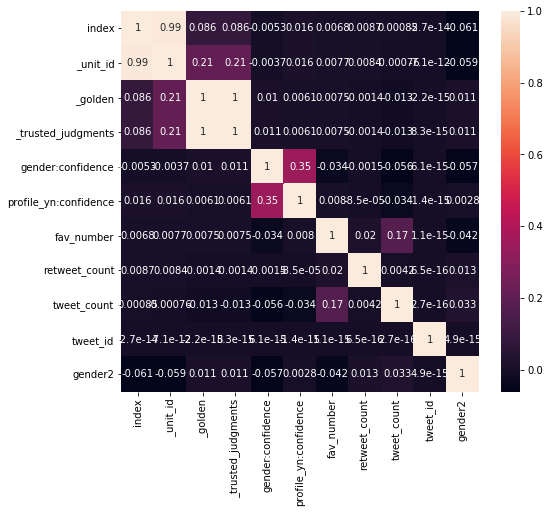

In [143]:
# Heat map for checking highly correlated columns
import seaborn as sb
plt.rcParams['figure.figsize'] = 8,7
sb.heatmap(df.corr(), annot=True) 

In [144]:
df.columns

Index(['index', '_unit_id', '_golden', '_unit_state', '_trusted_judgments',
       '_last_judgment_at', 'gender', 'gender:confidence', 'profile_yn',
       'profile_yn:confidence', 'created', 'description', 'fav_number',
       'gender_gold', 'link_color', 'name', 'profile_yn_gold', 'profileimage',
       'retweet_count', 'sidebar_color', 'text', 'tweet_coord', 'tweet_count',
       'tweet_created', 'tweet_id', 'tweet_location', 'user_timezone',
       'gender2'],
      dtype='object')

In [145]:
df=df.drop(['_trusted_judgments','_unit_id'],axis=1) #Removing highly correlated columns

In [146]:
df.describe()

,index,gender:confidence,profile_yn:confidence,fav_number,retweet_count,tweet_count,tweet_id,gender2
count,12956.000000,12956.000000,12956.000000,12956.000000,12956.000000,1.295600e+04,1.295600e+04,12956.000000
mean,10325.572553,0.912748,0.993630,5462.940337,0.067613,2.947248e+04,6.590000e+17,0.479778
std,5966.829220,0.174251,0.045805,13100.653300,1.523792,7.084971e+04,7.629094e+04,0.499610
min,0.000000,0.000000,0.630800,0.000000,0.000000,1.000000e+00,6.590000e+17,0.000000
25%,4676.000000,1.000000,1.000000,136.000000,0.000000,2.277750e+03,6.590000e+17,0.000000
50%,10842.500000,1.000000,1.000000,1123.000000,0.000000,9.296000e+03,6.590000e+17,0.000000
75%,15525.250000,1.000000,1.000000,4942.250000,0.000000,3.015700e+04,6.590000e+17,1.000000
max,20049.000000,1.000000,1.000000,341621.000000,153.000000,2.680199e+06,6.590000e+17,1.000000


####  Ploting each of the features

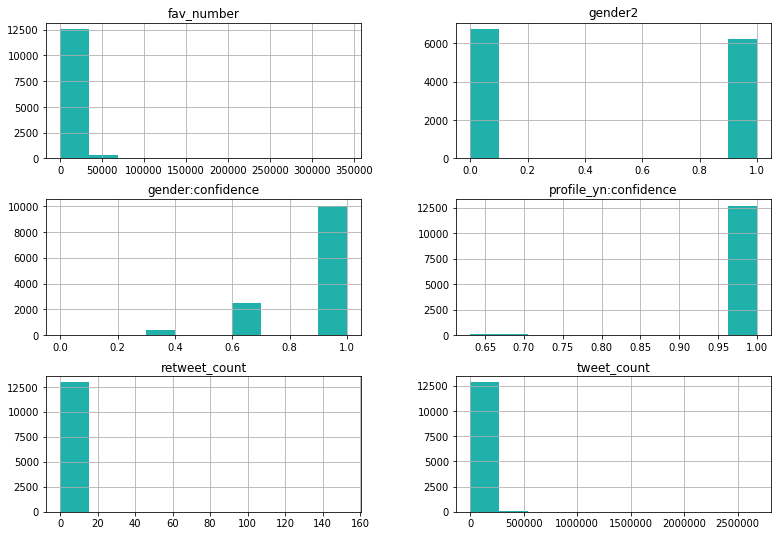

In [270]:
viz=df[['gender:confidence','profile_yn:confidence','fav_number','retweet_count','tweet_count','gender2']]
viz.hist(color='lightseagreen')
plt.show()
plt.rcParams['figure.figsize'] = 13,9

#### Plotting the gender count

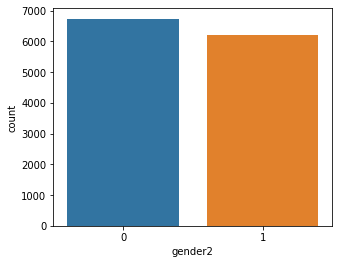

In [272]:
sns.countplot(x='gender2',data=df)
plt.rcParams['figure.figsize'] =5,4

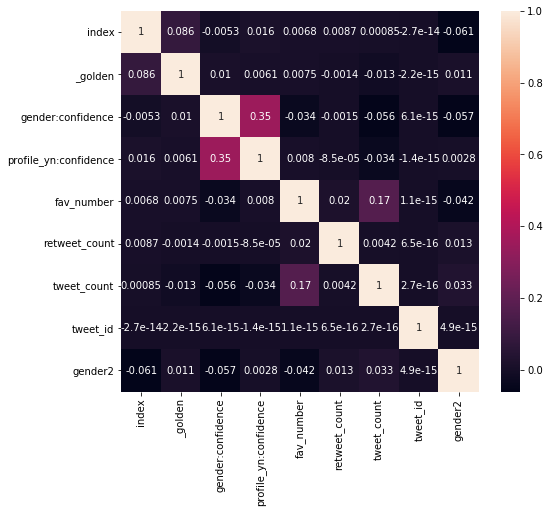

In [273]:
import seaborn as sb
plt.rcParams['figure.figsize'] = 8,7
sb.heatmap(df.corr(), annot=True)

#### Training and testing the data using model_selection

In [150]:
from sklearn.model_selection import train_test_split

### Feature Selection

In [151]:
x=df[['gender:confidence','profile_yn:confidence','fav_number','retweet_count','tweet_count','tweet_id']].values#independent variables
y=df[['gender2']].values#dependent variable

In [152]:
X_train, X_test, Y_train, Y_test=train_test_split(x,y)

In [153]:
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((9717, 6), (3239, 6), (9717, 1), (3239, 1))

# Logistic Regression

In [154]:
from sklearn.linear_model import LogisticRegression
LogReg = LogisticRegression()
# training Linear Regression model on training data
LogReg.fit(X_train, Y_train)
# The coefficients
print ('Coefficients: ', LogReg.coef_)
print ('Intercept: ',LogReg.intercept_)


Coefficients:  [[-3.25555489e-37 -1.80533386e-37 -8.03199588e-33  3.07227226e-37
   3.22497622e-32 -1.19684031e-19]]
Intercept:  [-1.81614614e-37]


In [252]:
Accuracy_of_Logistic_Regression=LogReg.score(X_test, Y_test)
print("Logistic_Regression_Accuracy:",Accuracy_of_Logistic_Regression*100,"%")

Logistic_Regression_Accuracy: 52.17659771534424 %


#### Plotting

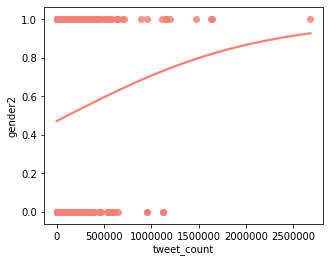

In [224]:
sb.regplot(x='tweet_count',
           y="gender2", data=df,logistic=True,ci=None,color='salmon')
plt.rcParams['figure.figsize'] = 5,4

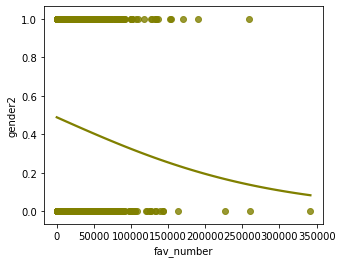

In [220]:
sb.regplot(x='fav_number',
           y="gender2", data=df,logistic=True,ci=None,color='olive')
plt.rcParams['figure.figsize'] = 5,4

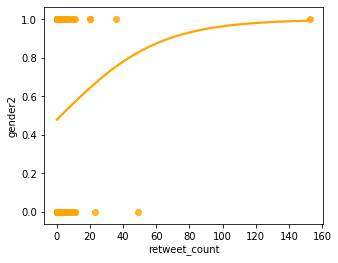

In [227]:
sb.regplot(x='retweet_count',
           y="gender2", data=df,logistic=True,ci=None,color='orange')
plt.rcParams['figure.figsize'] = 5,4

# K Nearest Neighbours (KNN)

In [159]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [160]:
knn=KNeighborsClassifier()

In [161]:
knn

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [162]:
knn.fit(X_train,Y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [163]:
Y_pred=knn.predict(X_test)

In [251]:
Accuracy_of_KNN = accuracy_score(Y_test,Y_pred)
print("---------------------------------------------------- ")
print("The accuracy of KNN:",Accuracy_of_KNN*100,"%")
print("---------------------------------------------------- ")

---------------------------------------------------- 
The accuracy of KNN: 53.56591540598951 %
---------------------------------------------------- 


#### Plotting

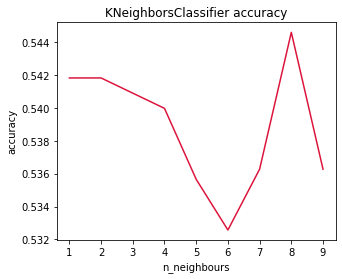

In [275]:
from sklearn.neighbors import KNeighborsClassifier

accuracies=[]
for k in range(1,10):
  classifier = KNeighborsClassifier(n_neighbors = k)
  classifier.fit(X_train, Y_train)
  accuracies.append(classifier.score(X_test, Y_test)) 
  plt.ylabel('accuracy')
plt.xlabel('n_neighbours')
plt.title('KNeighborsClassifier accuracy')
k_list=list(range(1,10)) 
plt.plot(k_list,accuracies,color='crimson')
plt.show()
plt.rcParams['figure.figsize'] = 5,4

# Support Vector Machines (SVM)

In [166]:
from sklearn.svm import SVC
from sklearn import svm, datasets
from sklearn.metrics import accuracy_score
import pylab as pl
svc = SVC(kernel='linear')
svc.fit(X_train, Y_train)# The coefficients

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [250]:
y_pred = svc.predict(X_test)
from sklearn.metrics import classification_report, confusion_matrix
print (classification_report(Y_test, y_pred))
Accuracy_of_SVM = accuracy_score(Y_test,y_pred)
print("---------------------------------------------------- ")
print("Accuracy of SVM:",Accuracy_of_SVM*100,"%")
print("---------------------------------------------------- ")

              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1690
           1       0.48      1.00      0.65      1549

    accuracy                           0.48      3239
   macro avg       0.24      0.50      0.32      3239
weighted avg       0.23      0.48      0.31      3239

---------------------------------------------------- 
Accuracy of SVM: 47.82340228465576 %
---------------------------------------------------- 


# Random Forest

In [185]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
rfc = RandomForestClassifier()
# training Linear Regression model on training data
rfc.fit(X_train, Y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [249]:
y_pred = rfc.predict(X_test)
from sklearn.metrics import classification_report, confusion_matrix
print (classification_report(Y_test, y_pred))
Accuracy_of_Random_Forest=accuracy_score(Y_test,y_pred)
print("---------------------------------------------------- ")
print("Accuracy of Random Forest:",Accuracy_of_Random_Forest*100,"%")
print("---------------------------------------------------- ")

              precision    recall  f1-score   support

           0       0.57      0.57      0.57      1690
           1       0.53      0.52      0.53      1549

    accuracy                           0.55      3239
   macro avg       0.55      0.55      0.55      3239
weighted avg       0.55      0.55      0.55      3239

---------------------------------------------------- 
Accuracy of Random Forest: 55.0787280024699 %
---------------------------------------------------- 


### Accuracy comparision of each algorithm

In [247]:
print("\tThe accuracies of all the models" )
print("---------------------------------------------------- ")
print("Accuracy of KNN:",Accuracy_of_KNN)
print("\nAccuracy of SVM:",Accuracy_of_SVM)
print("\nAccuracy of Random Forest:",Accuracy_of_Random_Forest)
print("\nAccuracy of Logistic Regression:",Accuracy_of_Logistic_Regression)
print("-----------------------------------------------------")
print("\nThe model with highest accuracy ",Accuracy_of_Random_Forest,"is \"Random forest\"")

	The accuracies of all the models
---------------------------------------------------- 
Accuracy of KNN: 0.5356591540598951

Accuracy of SVM: 0.4782340228465576

Accuracy of Random Forest: 0.550787280024699

Accuracy of Logistic Regression: 0.5217659771534424
-----------------------------------------------------

The model with highest accuracy  0.550787280024699 is "Random forest"


## Text analysis


In [171]:
from nltk.corpus import stopwords

In [172]:
def cleaning(s):
    s = str(s)
    s = s.lower()
    s = s.replace("'s",' is')
    s = s.replace("'re",' are')
    s = s.replace("'ve",' have')
    s = re.sub('\s\W',' ',s) #whitespace characters
    s = re.sub('\W,\s',' ',s)
    s = re.sub(r'[^\w]', ' ', s)
    s = re.sub("\d+", "", s)
    s = re.sub('\s+',' ',s)
    s = re.sub('[!@#$_]', '', s)
    s = s.replace("ù","")
    s = s.replace("ù", "")
    s = s.replace("û", "")
    s = s.replace("âù", "")
    s = s.replace("ü", "")
    s = s.replace("å", "")
    s = s.replace("â", "")
    s = s.replace("ä", "")
    s = s.replace("co","")
    s = s.replace("https","")
    s = s.replace(",","")
    s = s.replace("[\w*"," ")
    return s



print("Sample entry: ")
print(df.text.get(64))
print("\n")
df['Tweets'] = [cleaning(s) for s in df['text']]
df['Description'] = [cleaning(s) for s in df['description']]

print("Sample entry with special characters cleared ")
print(df.Tweets.get(64))

print("\n")

df.dropna(inplace=True,axis=0) # getting rid of lines without NaN data

Sample entry: 
Move Of The Week Double Leg Stretch ‰Û_ : https://t.co/kxkCEFUxQB ... https://t.co/n7PtOHGaPQ


Sample entry with special characters cleared 
move of the week double leg stretch   t  kxkcefuxqb  t  nptohgapq




In [173]:
def stop_words(df, column_name,splitted=False):
    #funcion deleting stop words 
    
    stop = set(stopwords.words('english'))
    notInStopSet = lambda word: word not in stop
    if splitted == False:
        df[column_name] = df[column_name].str.lower().str.split()

    df[column_name] = df[column_name].apply(lambda x: [item for item in x if notInStopSet(item)])

    if splitted == False:
        df[column_name] = df[column_name].apply(lambda x: ' '.join(x))
        
def stemming(df, column_name,splitted=False):
    #funcion stemming 
    sno = nltk.stem.SnowballStemmer('english')
    stop = set(stopwords.words('english'))
    notInStopSet = lambda word: word not in stop
    if splitted == False:
        df[column_name] = df[column_name].str.lower().str.split()

    df[column_name] = df[column_name].apply(lambda x: [sno.stem(item) for item in x if notInStopSet(item)])

    if splitted == False:
        df[column_name] = df[column_name].apply(lambda x: ' '.join(x))

        
stop_words(df, 'Tweets')
stop_words(df, 'Description')

print("Example entry for removing stop words: ")
print(df.Tweets.get(64))
print("\n")        
        
stemming(df, 'Tweets')
stemming(df, 'Description')

print("Sample stemming entry:")
print(df.Tweets.get(64))
print("\n")

Example entry for removing stop words: 
move week double leg stretch kxkcefuxqb nptohgapq


Sample stemming entry:
move week doubl leg stretch kxkcefuxqb nptohgapq




## The most common emotions/words used by Males and Females

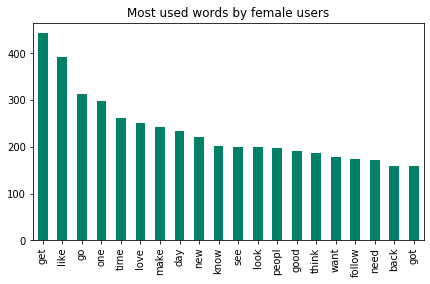

In [295]:
Male = df[df['gender2'] == 0]
Female = df[df['gender2'] == 1]
Male_Words = pd.Series(' '.join(Male['Tweets'].astype(str)).lower().split(" ")).value_counts()[:20]
Female_Words = pd.Series(' '.join(Female['Tweets'].astype(str)).lower().split(" ")).value_counts()[:20]
plot0 = Female_Words.plot(kind='bar',stacked=True, colormap='summer', title='Most used words by female users')
fig0 = plot0.get_figure()
fig0.savefig("female_words.jpg")
plt.rcParams['figure.figsize'] = 7,4

### From the above graph

In [175]:
print("The most common word used by female users is \"get\"")

The most common word used by female users is "get"


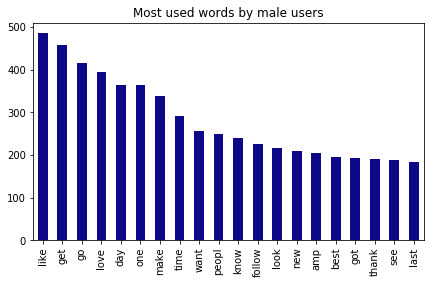

In [297]:
plot1 = Male_Words.plot(kind='bar',stacked=True, colormap='plasma', title='Most used words by male users' )
fig1 = plot1.get_figure()
fig1.savefig("male_words.jpg")
plt.rcParams['figure.figsize'] = 7,4

### From the above graph

In [177]:
print("The most common word used by male users is \"like\"")

The most common word used by male users is "like"


##  Common word

In [178]:
Common_words=pd.Series(' '.join(df['Tweets'].astype(str)).lower().split(" ")).value_counts()[:1]

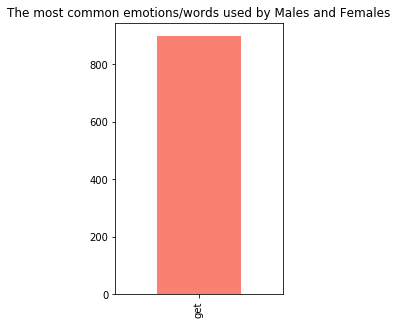

In [289]:
plot0 = Common_words.plot(kind='bar',stacked=True, color='salmon', title='The most common emotions/words used by Males and Females')
plt.rcParams['figure.figsize'] = 3,5

### From the above graph

In [180]:
print("----------------------------------------------------------")
print("The most common word used by Males and Females is: \"get\"")
print("----------------------------------------------------------")

----------------------------------------------------------
The most common word used by Males and Females is: "get"
----------------------------------------------------------


##  The gender who makes more typos in their tweets

In [181]:
xvar=df.reset_index()

In [182]:
from spellchecker import SpellChecker

spell = SpellChecker()

# find those words that may be misspelled
misspelled = spell.unknown(xvar["Tweets"])

i=0
count_of_males=0
count_of_females=0
for word in misspelled:
    for k in xvar["Tweets"]:
        if word==k:
            if xvar["gender"][i]=="male":
                count_of_males+=1
                i=i+1
            else:
                count_of_females+=1
                i=i+1
        else:
            continue
print("---------------------------------------------------- ")
print("Number of males who made typos in their Tweets:",count_of_males)
print("\nNumber of females who made typos in their Tweets:",count_of_females)
print("---------------------------------------------------- ")
if count_of_males>count_of_females:
    print("\nMales are the one who made more typos in their tweets")
    print("\n---------------------------------------------------- ")
else:
    print("\nFemales are the one who made more typos in their tweets")

---------------------------------------------------- 
Number of males who made typos in their Tweets: 1511

Number of females who made typos in their Tweets: 1381
---------------------------------------------------- 

Males are the one who made more typos in their tweets

---------------------------------------------------- 
